In [3]:
import os
import glob
import json

%matplotlib inline

In [5]:
INPUT_FOLDER = '../bucket/malaysian-tweets'
tweets = os.listdir(INPUT_FOLDER)
tweets.sort()

In [ ]:
slices = [pydicom.read_file(s) for s in glob.glob(path + '/*/*/*.json')]print(slices)

In [ ]:
for s in glob.glob('/*/*/*.json'):
    print(s)

In [1]:
data = json.loads("[%s]" % (open("2018-09-21-.json",'r').read()))

FileNotFoundError: [Errno 2] No such file or directory: '2018-09-21-.json'

In [35]:
# count = 0

print(data.count("geo"))
# for x in data:
#     if "country" in x["place"]:
#         print("hey")
#     print(x["place"]["country"])
#     if 'country' in x['place']:
#         count += 1

0


In [36]:
import pandas as pd 
df = pd.DataFrame(data)
df.head()

# df.count()
# print(df['places'])
# print(data.coordinates)

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,filter_level,...,quoted_status_id_str,quoted_status_permalink,reply_count,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,None,None,Thu Sep 20 15:28:59 +0000 2018,NaN,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...","Yung klase kanina, nag stastate ng opinion and...",1537457339150,False,"{'contributors_enabled': False, 'created_at': ..."
1,None,None,Thu Sep 20 15:28:59 +0000 2018,NaN,"{'hashtags': [], 'symbols': [], 'urls': [{'dis...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",https://t.co/qDMvmaZiYV,1537457339257,False,"{'contributors_enabled': False, 'created_at': ..."
2,None,None,Thu Sep 20 15:28:59 +0000 2018,"[7, 38]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",@wyzxa Mahal laa. Baik aku beli kasut👻,1537457339583,False,"{'contributors_enabled': False, 'created_at': ..."
3,None,None,Thu Sep 20 15:28:59 +0000 2018,"[10, 65]","{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/android"" ...",@keyembi_ walang makakapantay sa pagmamahal ng...,1537457339921,False,"{'contributors_enabled': False, 'created_at': ..."
4,None,None,Thu Sep 20 15:29:00 +0000 2018,NaN,"{'hashtags': [], 'symbols': [], 'urls': [], 'u...",NaN,NaN,0,False,low,...,NaN,NaN,0,0,False,"<a href=""http://twitter.com/download/iphone"" r...",tanginang kuryente yan,1537457340529,False,"{'contributors_enabled': False, 'created_at': ..."


In [37]:
placeList = [j for j in df.place if j is not None]

In [38]:
countries = [i['country']  for i in placeList if i['country'] is not None]
type(countries)

list

In [39]:
pd.Series(countries).value_counts()

Republic of the Philippines         3433
Malaysia                            2113
Thailand                             653
ประเทศไทย                            647
Singapore                            179
Indonesia                            115
Republika ng Pilipinas                22
Myanmar                               18
Vietnam                               15
Cambodia                              14
新加坡                                   14
Việt Nam                              13
Brunei                                 5
Lao People's Democratic Republic       4
Tailandia                              3
Malasia                                2
                                       2
República de Filipinas                 2
Singapur                               2
Thaïlande                              1
Malaisie                               1
Singapour                              1
dtype: int64

In [40]:
# subset obs with 'place' 
df_with_place = df[~pd.isna(df.place)]

In [41]:
# subset obs with 'coutnry' 
mask = [True  for i in placeList if i['country'] is not None]
df_with_country = df_with_place[mask]

In [42]:
# replace
# tweets['country'].replace('united Kingdom','uk',inplace=True)


# subset obs with 'country' == "Malaysia"
another_mask = [i['country'] == "Malaysia" for i in placeList]
df_Malaysia = df_with_country[another_mask]

In [43]:
pd.Series(df_Malaysia.lang).value_counts()

in     1213
en      531
und     149
tl      110
ja       13
et       12
ar       10
es        7
fr        7
ht        7
it        6
nl        5
eu        4
pl        3
zh        3
de        3
hu        3
lv        3
tr        3
da        2
ta        2
bn        2
ro        2
hi        2
fi        2
no        2
pt        2
lt        2
cy        1
ca        1
sv        1
Name: lang, dtype: int64

In [44]:
df_MY_in = df_Malaysia[df_Malaysia.lang == 'in']

In [45]:
# Swarm check-ins - might or might not want to get rid 
df_MY_in.text.str.contains("I'm at").value_counts()

False    1175
True       38
Name: text, dtype: int64

In [46]:
df_MY_in.text.str.contains("\(@ ").value_counts()

False    1191
True       22
Name: text, dtype: int64

In [47]:
# df_MY_in = df_MY_in.reset_index()
# df_MY_in[df_MY_in.text.str.contains("bunuh", case = False)].text[30291]
df_MY_in[df_MY_in.text.str.contains("sina", case = False)].text

Series([], Name: text, dtype: object)

In [48]:
df_MY_in.text.sort_values()[3000:]

Series([], Name: text, dtype: object)

In [49]:
import numpy as np
import pandas as pd
import re
import warnings

#Visualisation
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from IPython.display import display
import mpl_toolkits
# .basemap import Basemap
from wordcloud import WordCloud, STOPWORDS

#nltk
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

In [50]:
# print(STOPWORDS)
stopwords = set(STOPWORDS)
stopwords.update(["https", "la", "ke", "tu", "ni", "kau", "tak", "je", "yang","aku","dia","kalau","boleh","dah"])
print(stopwords)

{'about', 'against', 'below', 'we', 'la', "we're", 'before', 'once', 'when', 'for', 'me', 'were', 'aku', 'being', 'our', 'there', 'ourselves', "couldn't", 'http', "they'll", 'has', 'they', 'than', 'have', 'up', 'however', 'its', 'does', 'other', "we'll", "she'll", "i'll", "wasn't", 'should', 'over', "hadn't", 'your', 'itself', "what's", 'at', "here's", 'an', 'any', 'these', "won't", 'it', "they're", "they'd", 'more', 'a', 'in', 'then', 'and', 'down', 'herself', "how's", 'what', 'since', 'tu', 'all', 'to', 'after', 'can', 'else', 'few', 'i', 'him', "they've", 'the', 'their', "haven't", 'her', 'yang', 'doing', 'such', 'who', "where's", 'until', "she'd", 'could', 'having', 'https', 'most', "doesn't", 'off', "weren't", 'above', 'no', 'yourselves', 'com', 'been', 'www', 'he', 'just', 'through', "wouldn't", 'themselves', 'boleh', 'nor', 'between', 'own', "isn't", "he's", 'under', 'yours', 'some', "who's", 'which', 'but', "you'll", "you've", 'tak', 'his', 'while', 'also', 'like', 'further', '

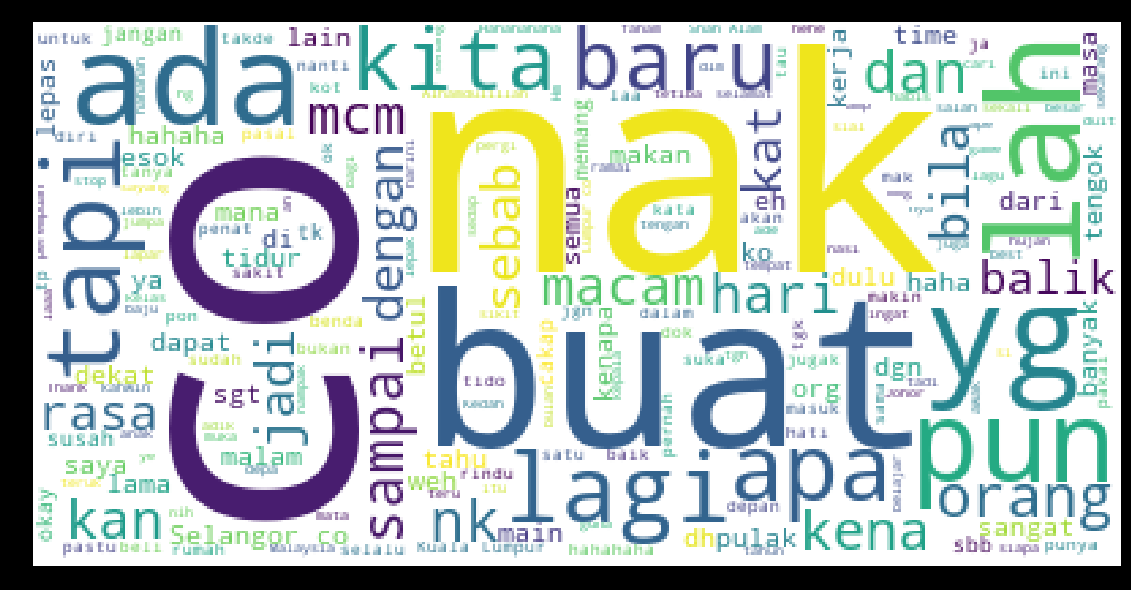

In [51]:
tweets = df_MY_in

def wordcloud(tweets,col):
#     stopwords = set(STOPWORDS)
    
    wordcloud = WordCloud(background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.title("Tweets")
wordcloud(tweets,'text')  

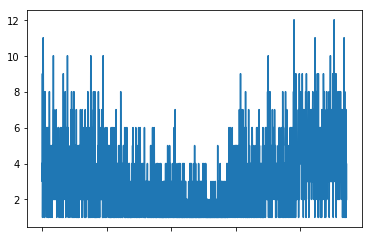

In [67]:
from pandas import Series
from matplotlib import pyplot

# sentence_list = [df.timestamp_ms.values,list(df.timestamp_ms.values_count)]
# print("List of Sentences: \n", sentence_list)
# series = pd.Series(sentence_list)
# print("Series of Sentences: \n", sentence_series)

series = pd.Series(df.created_at.unique())
series2 = pd.Series(df.created_at).value_counts()

s = pd.Series(series2, index=series)
s.plot()

# fig.set_size_inches(18.5, 10.5)
# fig.savefig('test2png.png', dpi=300)
# print(s)

# series.append(df.timestamp_ms)
# series.plot(kind='kde')
# pyplot.show()

# series = Series.from_csv('daily-minimum-temperatures.csv', header=0)
# series.plot(kind='kde')
# pyplot.show()

In [53]:
list(df)

['contributors',
 'coordinates',
 'created_at',
 'display_text_range',
 'entities',
 'extended_entities',
 'extended_tweet',
 'favorite_count',
 'favorited',
 'filter_level',
 'geo',
 'id',
 'id_str',
 'in_reply_to_screen_name',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'is_quote_status',
 'lang',
 'place',
 'possibly_sensitive',
 'quote_count',
 'quoted_status',
 'quoted_status_id',
 'quoted_status_id_str',
 'quoted_status_permalink',
 'reply_count',
 'retweet_count',
 'retweeted',
 'source',
 'text',
 'timestamp_ms',
 'truncated',
 'user']

In [63]:
list(df.created_at.values)

['Thu Sep 20 15:28:59 +0000 2018',
 'Thu Sep 20 15:28:59 +0000 2018',
 'Thu Sep 20 15:28:59 +0000 2018',
 'Thu Sep 20 15:28:59 +0000 2018',
 'Thu Sep 20 15:29:00 +0000 2018',
 'Thu Sep 20 15:29:00 +0000 2018',
 'Thu Sep 20 15:29:00 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:01 +0000 2018',
 'Thu Sep 20 15:29:03 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:03 +0000 2018',
 'Thu Sep 20 15:29:03 +0000 2018',
 'Thu Sep 20 15:29:03 +0000 2018',
 'Thu Sep 20 15:29:04 +0000 2018',
 'Thu Sep 20 15:29:02 +0000 2018',
 'Thu Sep 20 15:29:04 +0000 2018',
 'Thu Sep 20 15:29:04 +0000 2018',
 'Thu Sep 20 15:29:05 +0000 2018',
 'Thu Sep 20 15:29:05 +0000 2018',
 'Thu Sep 20 15:29:05 +0000 2018',
 'Thu Sep 20 15:29:05 +0000 2018',
 'Thu Sep 20 15:29:0

In [55]:
import pandas as pd
sentence_list = [list(df.timestamp_ms.values),]
print("List of Sentences: \n", sentence_list)
sentence_series = pd.Series(sentence_list)
print("Series of Sentences: \n", sentence_series)

List of Sentences: 
 [['1537457339150', '1537457339257', '1537457339583', '1537457339921', '1537457340529', '1537457340816', '1537457340876', '1537457342127', '1537457342076', '1537457342198', '1537457342413', '1537457342493', '1537457342675', '1537457342816', '1537457341671', '1537457343092', '1537457342203', '1537457343590', '1537457343859', '1537457343945', '1537457344051', '1537457342076', '1537457344893', '1537457344673', '1537457345754', '1537457345318', '1537457345902', '1537457345364', '1537457346182', '1537457346081', '1537457346425', '1537457346527', '1537457345835', '1537457346583', '1537457347050', '1537457347223', '1537457347320', '1537457347341', '1537457347323', '1537457347437', '1537457347403', '1537457347866', '1537457347866', '1537457347919', '1537457347960', '1537457348008', '1537457348006', '1537457348781', '1537457348887', '1537457348933', '1537457348854', '1537457349094', '1537457348925', '1537457349280', '1537457349137', '1537457349470', '1537457349706', '1537457